In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# Q3

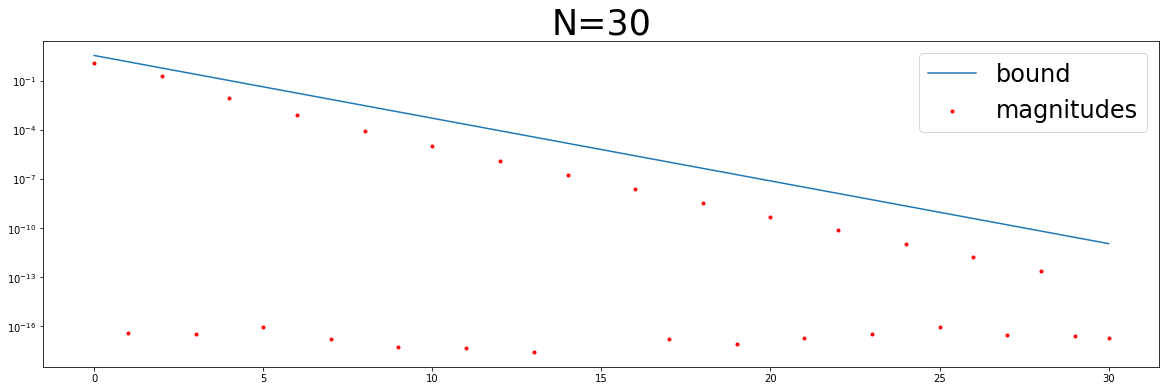

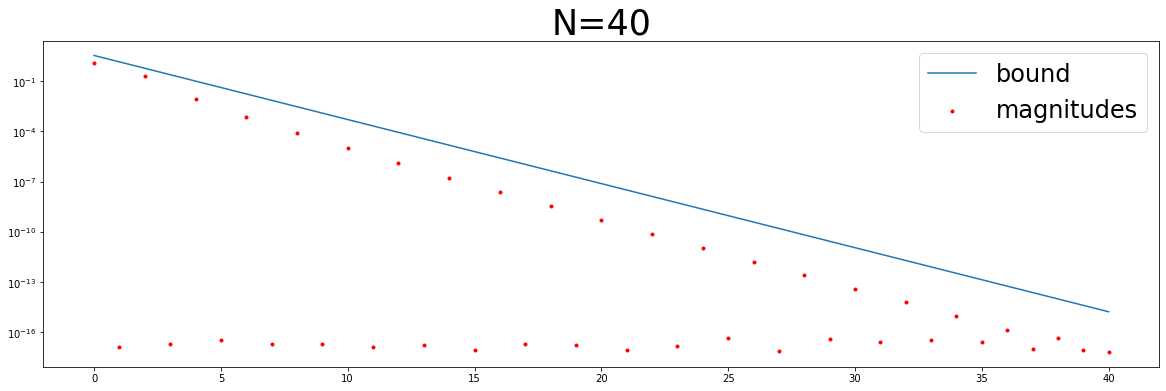

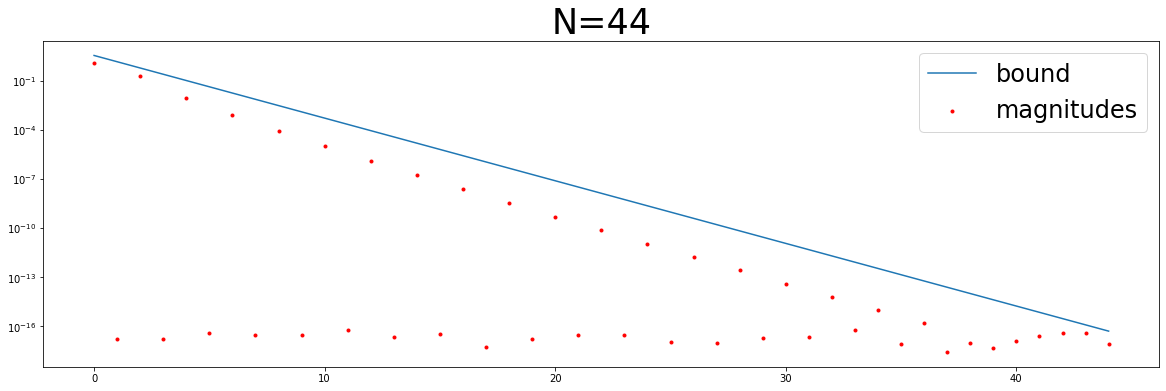

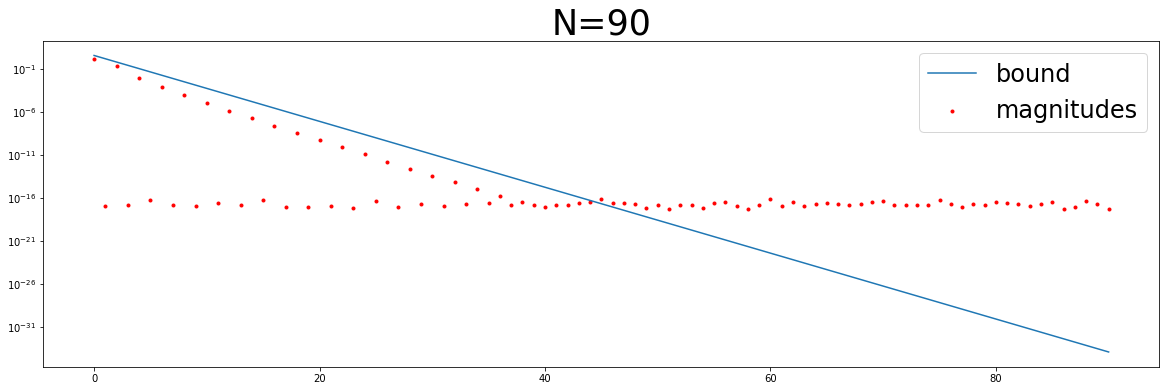

In [57]:
# Number of samplepoints
for N in [30,40,44,90]:
    theta = np.linspace(0,np.pi,num=N+1,endpoint=True)
    x=np.cos(theta)
    y = np.abs(x-1j)
    # y=np.append(y,y[1:N+1:-1])
    y = np.append(y, np.flip(y[1:N])) # Extension to S_{2N}
    yf = scipy.fftpack.fft(y)/(2*N)
    a = 2*yf[:N+1]
    a[0] = yf[0]
    a[-1] = yf[-1]

    C,rho=np.sqrt(3),1+np.sqrt(2)
    k = np.linspace(0,N,N+1)
    Mk = 2*C*np.power(rho,-k)

    fig, ax = plt.subplots(figsize=(20,6))

    ax.plot(k,Mk,label="bound")

    ax.scatter(k,np.abs(a),marker='.',color='r',label="magnitudes")
    plt.title('N={}'.format(N),fontsize=35)
    plt.legend(fontsize=24)
    plt.yscale('log') 
    plt.show()

# Q4(a)

In [38]:
def f(x):
    return x-1+1250*x**2-260000*x**4+21528000*x**6-947232000*x**8+25638412800*x**10-466152960000*x**12 + 6034375680000*x**14- 57930006528000*x**16 + 424820047872000*x**18 - 2432653747814400*x**20+ 11057517035520000*x**22 - 40383975260160000*x**24+ 119536566770073600*x**26 - 288405684905574400*x**28+ 568855350917201920*x**30 - 917508630511616000*x**32+ 1206989963132928000*x**34 - 1287455960675123200*x**36+ 1102487181118668800*x**38 - 746299014911098880*x**40+ 390051749953536000*x**42 - 151732604633088000*x**44+ 41341637204377600*x**46 - 7036874417766400*x**48 + 562949953421312*x**50

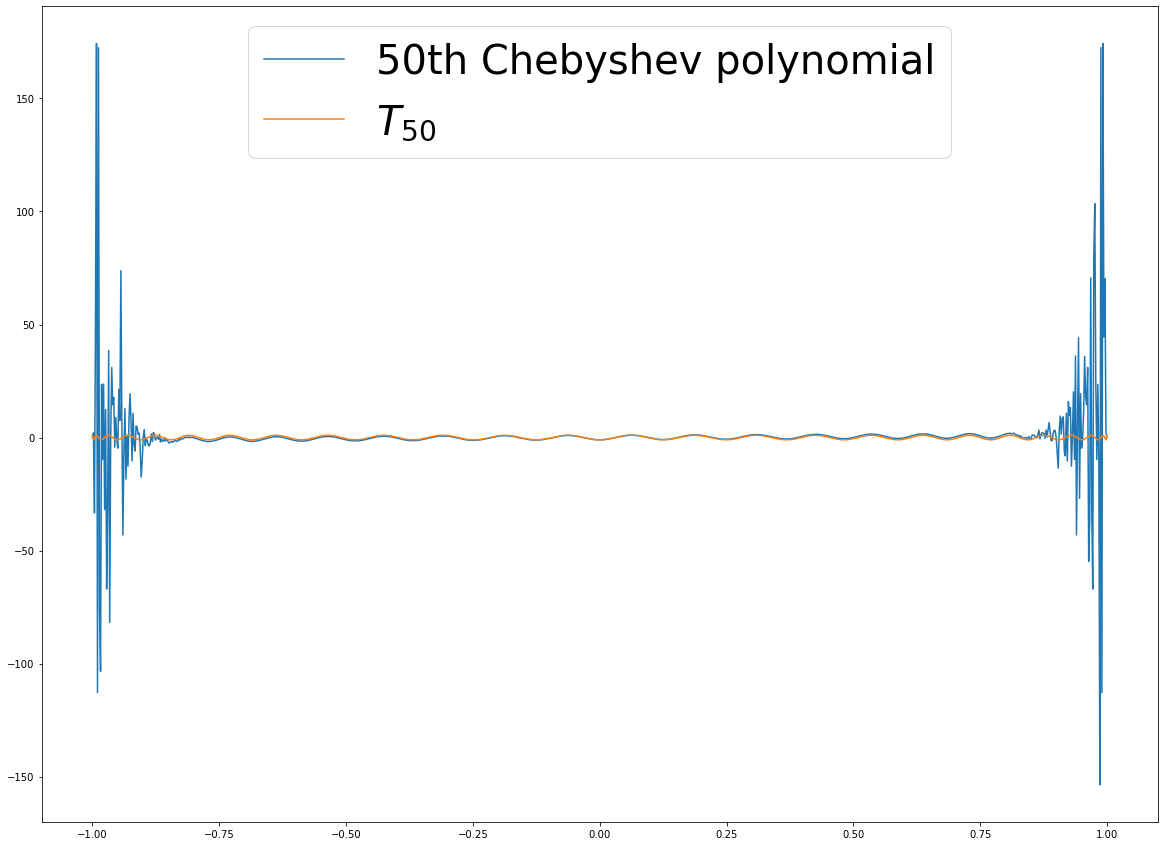

In [67]:
x=np.linspace(-1,1,1000)
plt.figure(figsize=(20,15))
plt.plot(x,f(x),label='50th Chebyshev polynomial')

tn1 = np.ones(1000);
tn = x
for k in range(1,50):
    tmp = 2*x*tn - tn1
    tn1 = tn
    tn = tmp

plt.plot(x,tn,label='$T_{50}$')
plt.legend(fontsize=40,loc='upper center')

plt.show()

# Q4(b)

In [98]:
def interpolate1(xin,yin,xout):
    n,m=len(xin),len(xout)
    yout=np.zeros(m)
    for j in range(n):
        lj = np.ones(m)
        for k in range(n):
            if k==j:
                continue
            fac = 1.0/(xin[j]-xin[k])
            lj=lj * fac * (xout-xin[k])
        yout=yout+yin[j]*lj
    return yout

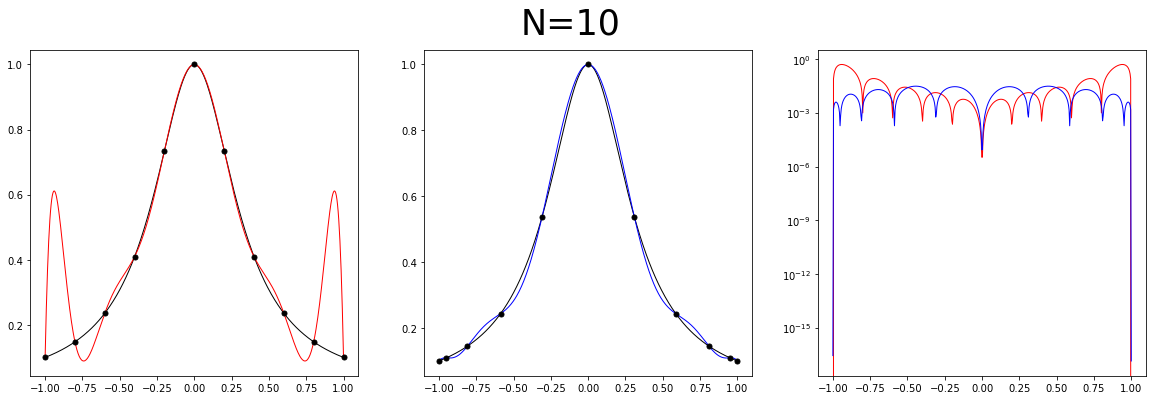

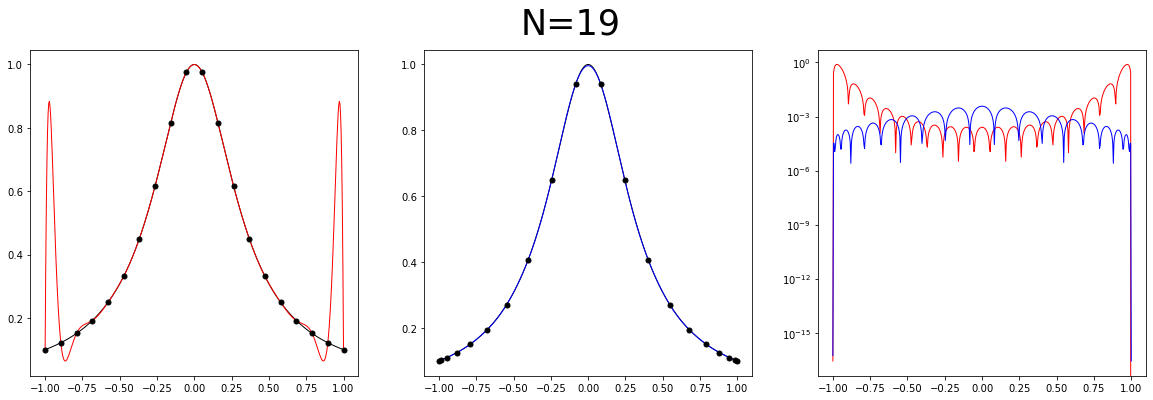

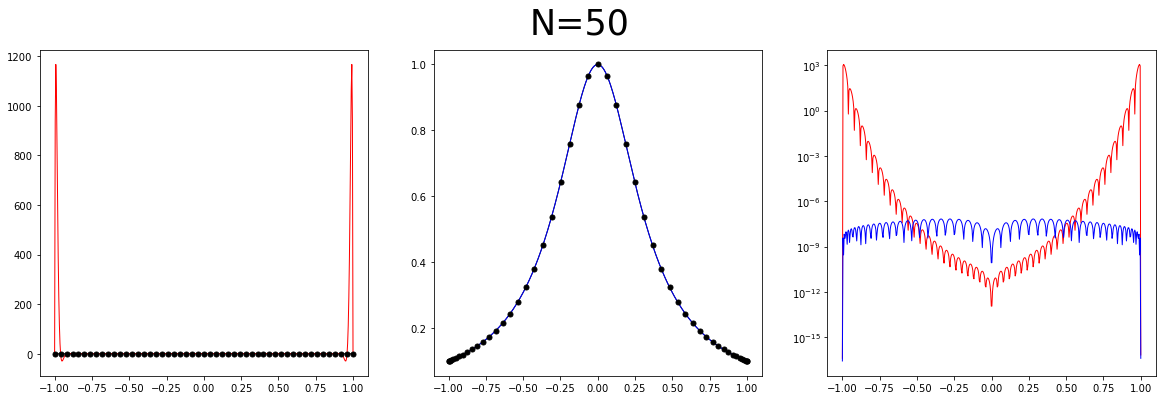

In [100]:
for N in [10,19,50]:
    xinU = np.linspace(-1,1,N+1,endpoint=True)
    xinC = np.cos(np.linspace(-np.pi, 0, N+1,endpoint=True))
    xout = np.linspace(-1,1,500,endpoint=True)
    f = lambda x: 1.0/(1+9*x*x)
    youtU = interpolate1(xinU,f(xinU),xout)
    youtC = interpolate1(xinC,f(xinC),xout)
    yerrU = np.abs(youtU - f(xout))
    yerrC = np.abs(youtC - f(xout))
    
    fig, axes = plt.subplots(1, 3,figsize=(20,6))
    fig.suptitle('N={}'.format(N),fontsize=35)
    
    # figure 1
    ax=axes[0]
    ax.plot(xout,f(xout),'k-',linewidth=1)
    ax.plot(xout,youtU,'r-',linewidth=1)
    ax.plot(xinU,f(xinU),'k.',markersize=10)
    
    # figure 2
    ax=axes[1]
    ax.plot(xout,f(xout),'k-',linewidth=1)
    ax.plot(xout,youtC,'b-',linewidth=1)
    ax.plot(xinC,f(xinC),'k.',markersize=10)
    
    # figure 3
    ax=axes[2]
    ax.set_yscale('log')
    ax.plot(xout,yerrU,'r-',linewidth=1)
    ax.plot(xout,yerrC,'b-',linewidth=1)
    plt.show()

# Q5(a)

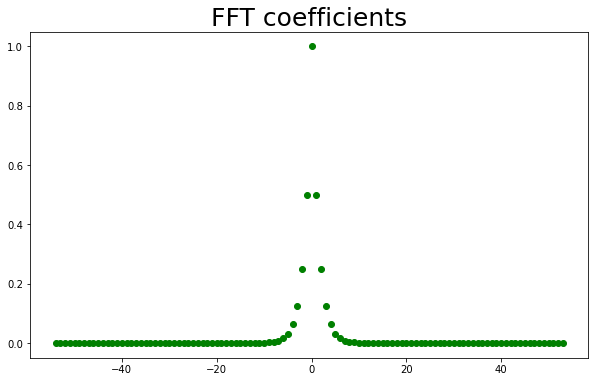

In [156]:
N=108
def f(x):
    return 3/(5-4*np.cos(x))
x = np.linspace(0,2*np.pi,N,endpoint=False)
fx = f(x)
yf = scipy.fftpack.fft(fx)/N

plt.figure(figsize=(10,6))
for i in range(-N//2, N//2):
    plt.plot(i, yf[i], 'go')
plt.title("FFT coefficients",fontsize=25)
plt.show()

In [152]:
np.real(scipy.fftpack.fft(fx)).round(2)

array([1.08e+02, 5.40e+01, 2.70e+01, 1.35e+01, 6.75e+00, 3.38e+00,
       1.69e+00, 8.40e-01, 4.20e-01, 2.10e-01, 1.10e-01, 5.00e-02,
       3.00e-02, 1.00e-02, 1.00e-02, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e

In [160]:
np.real(yf).round(3)

array([1.   , 0.5  , 0.25 , 0.125, 0.062, 0.031, 0.016, 0.008, 0.004,
       0.002, 0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.001,
       0.002, 0.004, 0.008, 0.016, 0.031, 0.062, 0.125, 0.25 , 0.5  ])

$$c_0 = 1$$
$$c_1 = c_{-1} = 0.5$$
$$c_2=c_{-2}=0.25$$
...
So the formula for $c_k$ is $\frac{1}{2^{|k|}}$

# Q5(b)

In [4]:
N=108
k = list(range(0,N//2+1))
k.extend(list(range(-N//2+1,0)))
print(len(k),k)

108 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, -53, -52, -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1]


In [8]:
x = np.linspace(0,2*np.pi,N,endpoint=False)
print(len(x),x)

108 [0.         0.05817764 0.11635528 0.17453293 0.23271057 0.29088821
 0.34906585 0.40724349 0.46542113 0.52359878 0.58177642 0.63995406
 0.6981317  0.75630934 0.81448698 0.87266463 0.93084227 0.98901991
 1.04719755 1.10537519 1.16355283 1.22173048 1.27990812 1.33808576
 1.3962634  1.45444104 1.51261869 1.57079633 1.62897397 1.68715161
 1.74532925 1.80350689 1.86168454 1.91986218 1.97803982 2.03621746
 2.0943951  2.15257274 2.21075039 2.26892803 2.32710567 2.38528331
 2.44346095 2.50163859 2.55981624 2.61799388 2.67617152 2.73434916
 2.7925268  2.85070444 2.90888209 2.96705973 3.02523737 3.08341501
 3.14159265 3.1997703  3.25794794 3.31612558 3.37430322 3.43248086
 3.4906585  3.54883615 3.60701379 3.66519143 3.72336907 3.78154671
 3.83972435 3.897902   3.95607964 4.01425728 4.07243492 4.13061256
 4.1887902  4.24696785 4.30514549 4.36332313 4.42150077 4.47967841
 4.53785606 4.5960337  4.65421134 4.71238898 4.77056662 4.82874426
 4.88692191 4.94509955 5.00327719 5.06145483 5.11963247 5.

In [9]:
x = np.arange(0,2*np.pi,2*np.pi/N)
print(len(x),x)

108 [0.         0.05817764 0.11635528 0.17453293 0.23271057 0.29088821
 0.34906585 0.40724349 0.46542113 0.52359878 0.58177642 0.63995406
 0.6981317  0.75630934 0.81448698 0.87266463 0.93084227 0.98901991
 1.04719755 1.10537519 1.16355283 1.22173048 1.27990812 1.33808576
 1.3962634  1.45444104 1.51261869 1.57079633 1.62897397 1.68715161
 1.74532925 1.80350689 1.86168454 1.91986218 1.97803982 2.03621746
 2.0943951  2.15257274 2.21075039 2.26892803 2.32710567 2.38528331
 2.44346095 2.50163859 2.55981624 2.61799388 2.67617152 2.73434916
 2.7925268  2.85070444 2.90888209 2.96705973 3.02523737 3.08341501
 3.14159265 3.1997703  3.25794794 3.31612558 3.37430322 3.43248086
 3.4906585  3.54883615 3.60701379 3.66519143 3.72336907 3.78154671
 3.83972435 3.897902   3.95607964 4.01425728 4.07243492 4.13061256
 4.1887902  4.24696785 4.30514549 4.36332313 4.42150077 4.47967841
 4.53785606 4.5960337  4.65421134 4.71238898 4.77056662 4.82874426
 4.88692191 4.94509955 5.00327719 5.06145483 5.11963247 5.

In [16]:
def prob5b(N):
    dx=2*np.pi/N
    x = np.linspace(0,2*np.pi,N,endpoint=False)
    f=3/(5-4*np.cos(x))
    fhat = scipy.fftpack.fft(f)/N
    k = list(range(0,N//2+1))
    k.extend(list(range(-N//2+1,0)))
    k=np.array(k)
    phi = 2*np.pi*k/N
    e1 = np.exp(1j*phi)
    e2 = e1.conj()
    uhat = fhat/((e1-2+e2)/(dx*dx) + 2/dx*(1-e2)+1)
    u = scipy.fftpack.ifft(uhat) * N
    return x,u

In [32]:
def evalDFT(yhat,x):
    m,N=len(x),len(yhat)
    N2=N//2
    e0=np.cos(x)+1j*np.sin(x)
    e1=e0.conj()
    ee=np.ones(m)
    y0=ee*yhat[N2-1]
    y1=ee*yhat[N2+1]
    for k in range(2,N2):
        y0 = ee*yhat[N2-k]+y0*e0
        y1 = ee*yhat[N2+k]+y1*e1
    y=ee*yhat[0]+y0*e0+y1*e1
    return y
def prob5exact(x,N):
    x = np.linspace(0,2*np.pi,N,endpoint=False)
    f=3/(5-4*np.cos(x))
    fhat = scipy.fftpack.fft(f)/N
    k = list(range(0,N//2+1))
    k.extend(list(range(-N//2+1,0)))
    k=np.array(k)
    uhat = fhat/(1j*k+1)**2
    uex = evalDFT(uhat,x)
    return uex

/Users/eliciaye/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/eliciaye/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/eliciaye/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


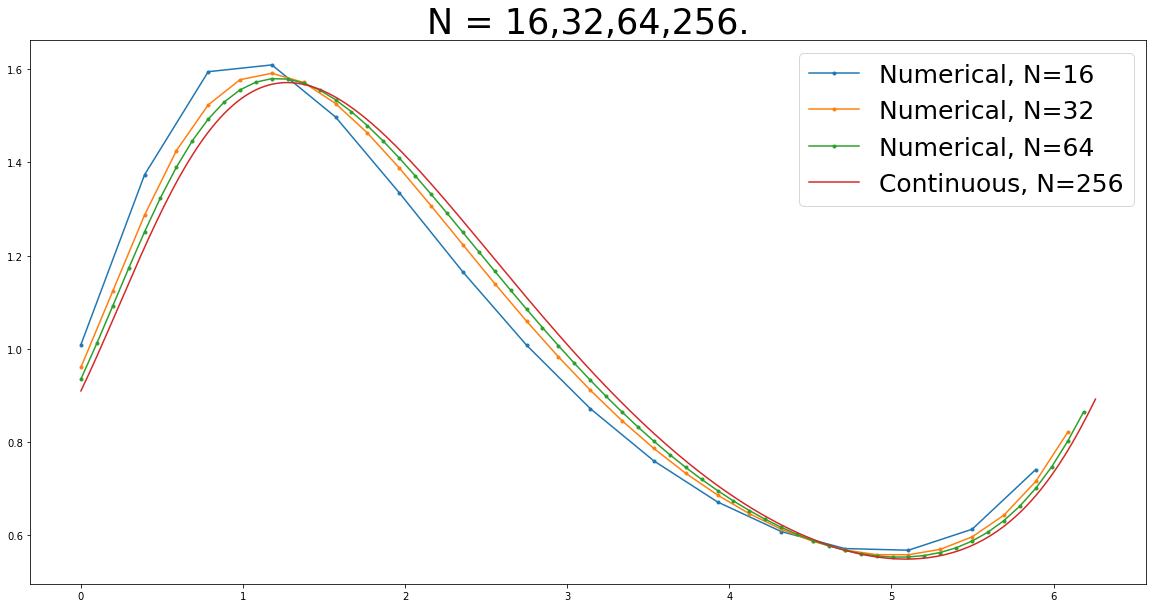

In [33]:
x16,u16=prob5b(16)
x32,u32=prob5b(32)
x64,u64=prob5b(64)
x256,u256=prob5b(256)
uex256=prob5exact(x256,256)
plt.figure(figsize=(20,10))
plt.plot(x16,u16.real,'.-',label='Numerical, N=16')
plt.plot(x32,u32,'.-',label='Numerical, N=32')
plt.plot(x64,u64,'.-',label='Numerical, N=64')
plt.plot(x256,uex256,'-',label='Continuous, N=256')
plt.title("N = 16,32,64,256.",fontsize=35)
plt.legend(fontsize=25)
plt.show()

[ 0.11049246 -1.01584674]


/var/folders/6c/g_bmsv2553304cpcf76xctf40000gn/T/ipykernel_1087/1578243196.py:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  bm=np.linalg.lstsq(a,b)[0]


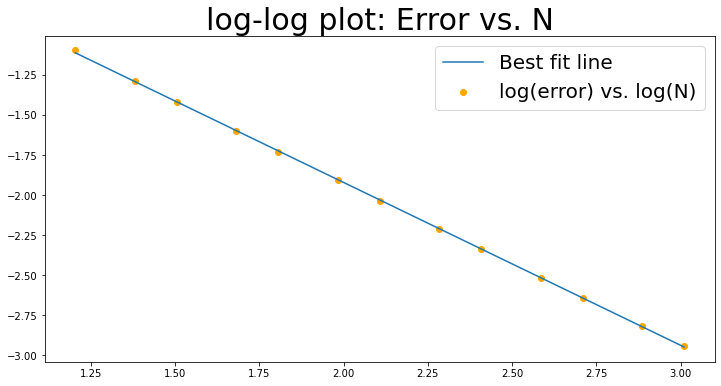

In [97]:
Nlist = [16,24,32,48,64,96,128,192,256,384,512,768,1024]
err = []
for N in Nlist:
    x,u=prob5b(N)
    uex=prob5exact(x,N)
    err.append(np.linalg.norm(u-uex,2)/np.sqrt(N))

a=np.column_stack((np.ones(len(Nlist)),np.log10(Nlist)))
b=np.log10(err)

bm=np.linalg.lstsq(a,b)[0]
print(bm)

errFit = bm[0]+bm[1]*np.log10(Nlist)
plt.figure(figsize=(12,6))
plt.plot(np.log10(Nlist),errFit,'-',label='Best fit line')
plt.scatter(np.log10(Nlist),np.log10(err),color='orange',label='log(error) vs. log(N)')

plt.title('log-log plot: Error vs. N',fontsize=30)
plt.legend(fontsize=20)
plt.show()

# Q5(c)

In [99]:
def prob5c(N):
    dx=2*np.pi/N
    x = np.linspace(0,2*np.pi,N,endpoint=False)
    f=3/(5-4*np.cos(x))
    fhat = scipy.fftpack.fft(f)/N
    k = list(range(0,N//2+1))
    k.extend(list(range(-N//2+1,0)))
    k=np.array(k)
    phi = 2*np.pi*k/N
    e1 = np.exp(1j*phi)
    e2 = e1.conj()
    uhat = fhat/((e1-2+e2)/(dx*dx) + 2/(2*dx)*(e1-e2)+1)
    u = scipy.fftpack.ifft(uhat) * N
    return x,u

/Users/eliciaye/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/eliciaye/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/eliciaye/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


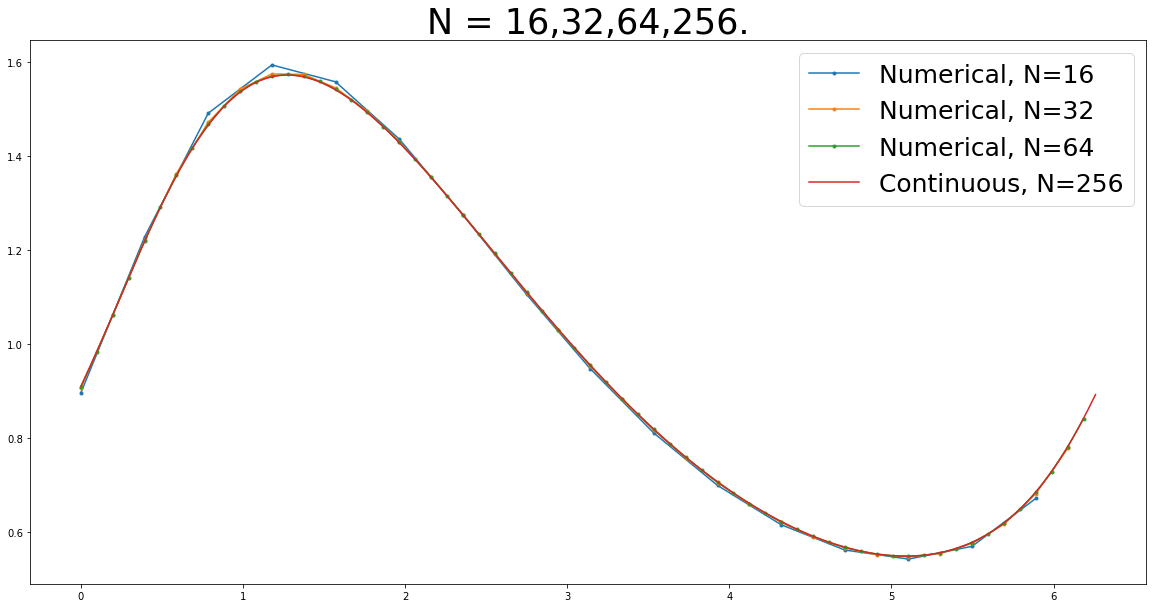

In [103]:
x16,u16=prob5c(16)
x32,u32=prob5c(32)
x64,u64=prob5c(64)
x256,u256=prob5c(256)
uex256=prob5exact(x256,256)
plt.figure(figsize=(20,10))

plt.plot(x16,u16.real,'.-',label='Numerical, N=16')
plt.plot(x32,u32,'.-',label='Numerical, N=32')
plt.plot(x64,u64,'.-',label='Numerical, N=64')
plt.plot(x256,uex256,'-',label='Continuous, N=256')
plt.title("N = 16,32,64,256.",fontsize=35)
plt.legend(fontsize=25)
plt.show()

[ 0.50083781 -2.00647446]


/var/folders/6c/g_bmsv2553304cpcf76xctf40000gn/T/ipykernel_1087/2787387388.py:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  bm=np.linalg.lstsq(a,b)[0]


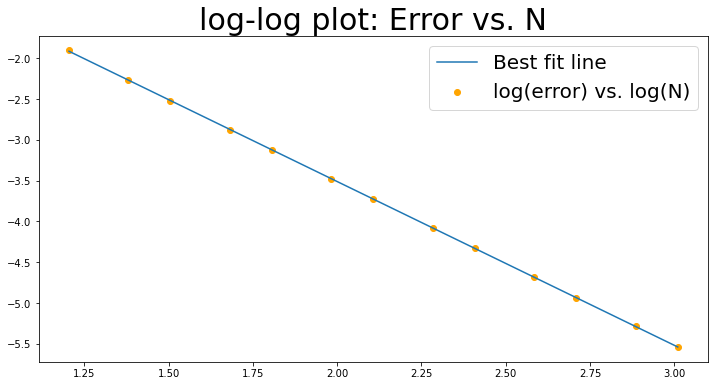

In [104]:
Nlist = [16,24,32,48,64,96,128,192,256,384,512,768,1024]
err = []
for N in Nlist:
    x,u=prob5c(N)
    uex=prob5exact(x,N)
    err.append(np.linalg.norm(u-uex,2)/np.sqrt(N))

a=np.column_stack((np.ones(len(Nlist)),np.log10(Nlist)))
b=np.log10(err)

bm=np.linalg.lstsq(a,b)[0]
print(bm)

errFit = bm[0]+bm[1]*np.log10(Nlist)
plt.figure(figsize=(12,6))
plt.plot(np.log10(Nlist),errFit,'-',label='Best fit line')
plt.scatter(np.log10(Nlist),np.log10(err),color='orange',label='log(error) vs. log(N)')

plt.title('log-log plot: Error vs. N',fontsize=30)
plt.legend(fontsize=20)
plt.show()